In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data cleaning
#### Read the data

In [2]:
data=pd.read_csv('Dataset-620.csv',sep=';')

In [3]:
data.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#### Examine the data

In [4]:
data.shape

(615, 13)

In [5]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [7]:
data.isna().sum()

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64

In [8]:
# check for whitespaces
print(data.columns.tolist())

['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina', 'gamma_glutamyl_transferase ', 'protein   ']


In [9]:
# remove whitespaces
data.columns = data.columns.str.strip()

In [10]:
data.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000


#### check for outliers

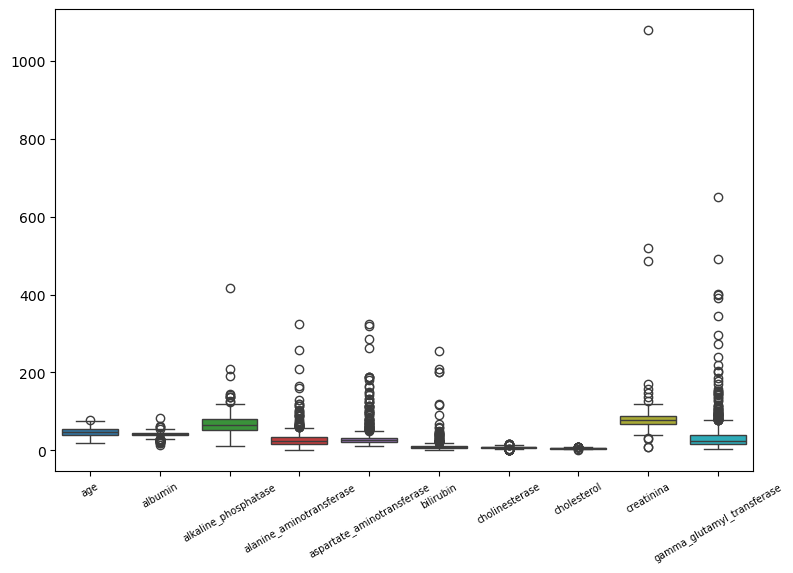

In [11]:
plt.figure(figsize=(9,6))
sns.boxplot(data)
plt.xticks(fontsize=7,rotation=30)
plt.show()

The dataset contains several outliers across features,especially for liver-related measurements.
These outliers likely represent genuine pathological conditions rather than noise.

#### clean the data

In [12]:
data1=data.copy()

In [13]:
data1.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#### converting datatypes to numeric

In [14]:
data1['protein']= pd.to_numeric(data1['protein'],errors='coerce')

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(2)

#### Encoding categorical features

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
for c in data1.columns:
    if data1[c].dtype=='object':
        data1[c]=le.fit_transform(data1[c])

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    int64  
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    int64  
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(3)
memory usa

#### Handle null values

In [20]:
data1.isna().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64

In [21]:
median_alkaline=data1['alkaline_phosphatase'].median()
median_alanine=data1['alanine_aminotransferase'].median()

In [22]:
mean_albumin=np.round(data1['albumin'].mean())

In [23]:
mean_chol=np.round(data1['cholesterol'].mean())

In [24]:
mean_protein=np.round(data1['protein'].mean())

In [25]:
data1.fillna({
    'albumin':mean_albumin,
    'alkaline_phosphatase':median_alkaline,
    'alanine_aminotransferase':median_alanine,
    'cholesterol': mean_chol,
    'protein': mean_protein
},inplace=True)

#### check for duplicates

In [26]:
data1.duplicated().sum()

np.int64(0)

Visualization


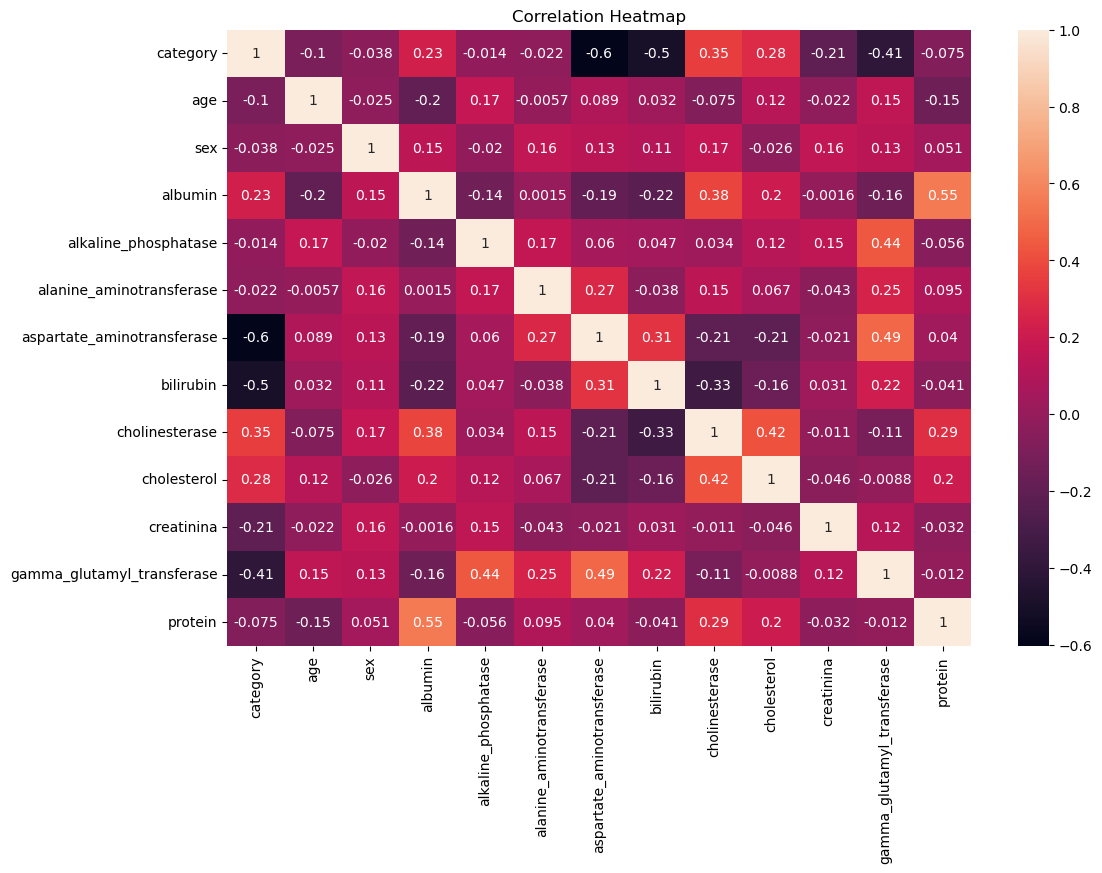

In [27]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

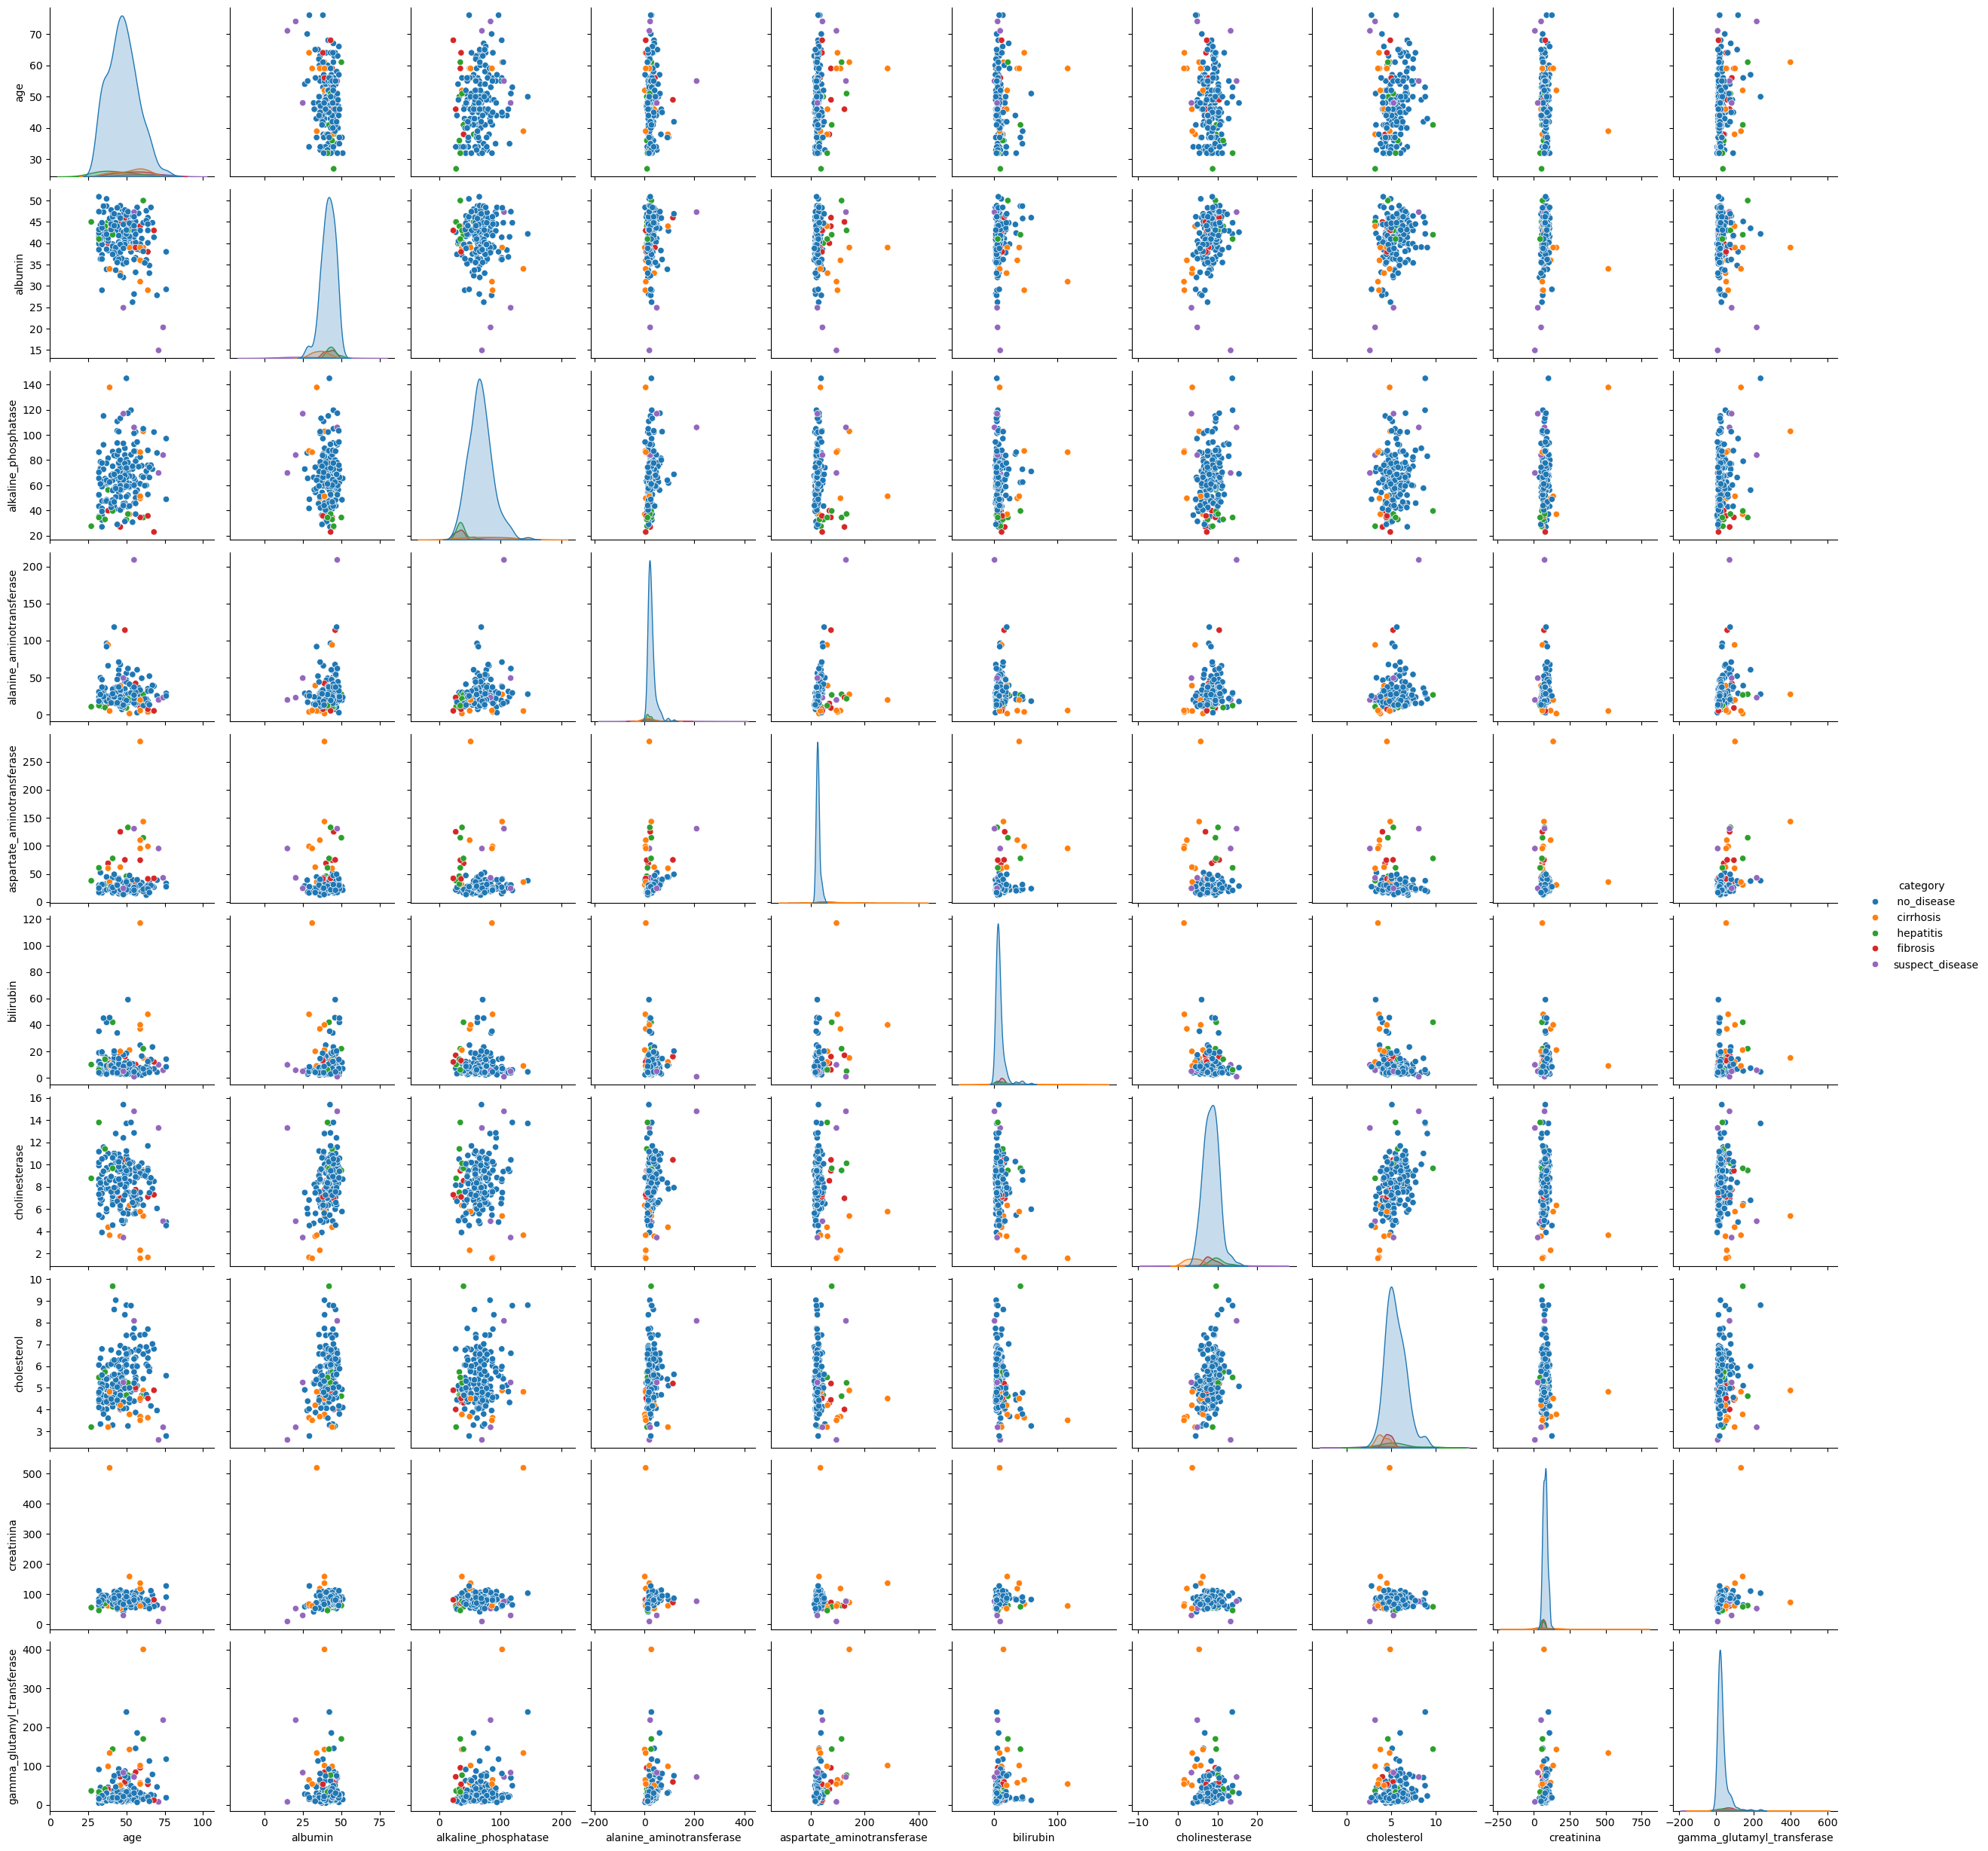

In [28]:
# Pair Plot sample
sns.pairplot(data.sample(200), hue="category")
plt.show()

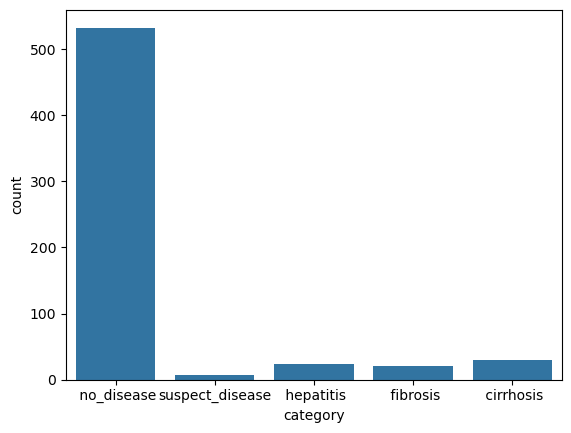

In [29]:
# Category count plot
sns.countplot(x="category", data=data)
plt.show()

 Train-Test Split

In [30]:
X = data1.drop("category", axis=1)
y = data1["category"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

Building the classification model

In [35]:
data1.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [36]:
data1.drop('category', axis=1).apply(lambda x: x.corr(data1['category'])).sort_values(ascending=False)

cholinesterase                0.349835
cholesterol                   0.282829
albumin                       0.229786
alkaline_phosphatase         -0.014320
alanine_aminotransferase     -0.022034
sex                          -0.038391
protein                      -0.075057
age                          -0.101460
creatinina                   -0.206598
gamma_glutamyl_transferase   -0.405606
bilirubin                    -0.497505
aspartate_aminotransferase   -0.601843
dtype: float64

Training a Logistic Regression classifier

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_scaled_train, y_train)

LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score
y_pred_lr = log_reg.predict(X_scaled_test)
print("Accuracy of logistic Regression Model:",np.round(accuracy_score(y_test, y_pred_lr),2))

Accuracy of logistic Regression Model: 0.93


In [40]:
from sklearn.metrics import classification_report
print("classification Report:\n",classification_report(y_test, y_pred_lr))

classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      0.25      0.33         4
           2       0.50      0.20      0.29         5
           3       0.96      1.00      0.98       107
           4       0.00      0.00      0.00         1

    accuracy                           0.93       123
   macro avg       0.53      0.46      0.47       123
weighted avg       0.90      0.93      0.91       123



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training a SVC Classifier

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(kernel='linear')
svc.fit(X_scaled_train, y_train)
y_pred_svc = svc.predict(X_scaled_test)
print("Accuracy of SVC Model:",np.round(accuracy_score(y_test, y_pred_svc),2))

Accuracy of SVC Model: 0.91


In [43]:
print("classification Report:\n",classification_report(y_test, y_pred_svc))

classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.33      0.25      0.29         4
           2       0.33      0.20      0.25         5
           3       0.95      0.99      0.97       107
           4       0.00      0.00      0.00         1

    accuracy                           0.91       123
   macro avg       0.46      0.42      0.43       123
weighted avg       0.89      0.91      0.90       123



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training a Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print("Accuracy of Randomforest Model:",np.round(accuracy_score(y_test, y_pred_clf),2))

Accuracy of Randomforest Model: 0.93


In [46]:
print("classification Report:\n",classification_report(y_test, y_pred_clf))

classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      0.25      0.33         4
           2       0.67      0.40      0.50         5
           3       0.96      1.00      0.98       107
           4       0.00      0.00      0.00         1

    accuracy                           0.93       123
   macro avg       0.57      0.50      0.52       123
weighted avg       0.92      0.93      0.92       123



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training a KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_scaled_train, y_train)
y_pred_knn = neigh.predict(X_scaled_test)
print("Accuracy of KNeighborsClassifier Model:",np.round(accuracy_score(y_test, y_pred_knn),3))

Accuracy of KNeighborsClassifier Model: 0.902


In [49]:
print("classification Report:\n",classification_report(y_test, y_pred_knn))

classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.92      1.00      0.96       107
           4       0.00      0.00      0.00         1

    accuracy                           0.90       123
   macro avg       0.32      0.33      0.33       123
weighted avg       0.83      0.90      0.87       123



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In this project, different machine learning models were used to predict liver disease based on patient health data. Models like Logistic Regression, SVM, KNN, and Random Forest were tested.

Among them, the Random Forest model performed the best with higher accuracy and balanced results.

The confusion matrix showed that it correctly identifies most liver disease cases and reduces missed detections.

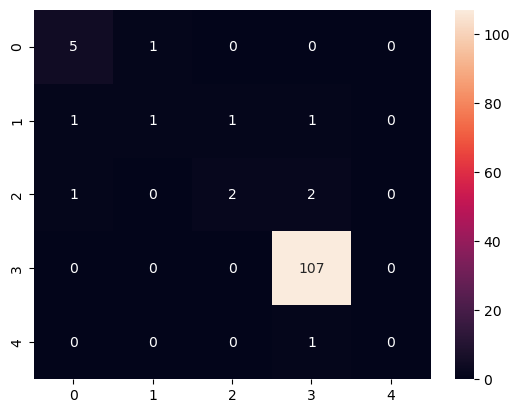

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(cm,annot = True , fmt='d' )
plt.show()

The confusion matrix shows that the model performs very well for Class 3, where most samples are correctly predicted with very few or no misclassifications. This indicates that the model is highly confident and accurate in identifying this class. For the other classes (0, 1, 2, and 4), the number of samples is small and some misclassifications are observed, which suggests that the model has limited learning for these classes due to less data. Overall, the model shows strong performance for the dominant class and reasonable predictions for smaller classes.

In [51]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pickle

with open("liver_model.pkl", "wb") as file:
    pickle.dump(clf, file)
